<a href="https://colab.research.google.com/github/Dash4ka/nlp-course/blob/main/2%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практикум: строим векторную модель для контент-анализа Telegram

#### Шаг 1: выгрузка данных из Telegram-канала

- извлекаем тексты из Telegram-канала
- используем код из занятия 1, чтобы извлечь все тексты
- сохраняем тексты в формате `txt`, например, `data.txt`

Эти тексты понадобятся нам, поэтому сохраним `data.txt` у себя на компьютере.

Подсказка: используйте метод `writelines` для записи строк в один файл

```
f.writelines(["cat\n", "dog\n"])
```

In [ ]:
### Ваш код здесь ###

import json

# Загрузка данных
with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)
texts = []
for message in data['messages']:

  if isinstance (message['text'], list):
    for text in message ['text']:
      if isinstance (text, str):
        texts.append(text)

      else:
        texts.append (text['text'])

  else:
    texts.append(message['text'])

In [ ]:
print(texts[0])

Капчи для LLM -


In [ ]:
with open ('tutorial_1.txt', 'w',  encoding="utf-8") as f:
   f.writelines(texts)

#### Шаг 2: откройте файл и запишите текст в переменную

Запишите весь текст в одну переменную, т.к. мы будем использовать необычный способ деления текста на документы.

In [ ]:
### Ваш код здесь: откройте файл и запишите его в перменную ###

with open('tutorial_1.txt', 'r', encoding="utf-8") as f:
      data = f.read()

Разделим текст на **чанки** - небольшие отрывки удобные для обработки.

**Вопрос:** зачем делить текст на чанки?

Мы будем использовать готовый инструмент "рекурсивный сплитер". Этот инструмент создан на основе статистических алгоритмов и построен так, чтобы делить весь текст с учетом особенностей *синтаксиса*. В его основе - рекурсивный алгоритм, который вычисляет повторяющиеся (рекурсивные) паттерны, т.е. закономерности, в тексте.

In [ ]:
# Импортируем сплитер из библиотеки langchain
# Langchain - это набор инструментов для построения диалоговых систем с LLM
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Инициализируем сплитер
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,   # Задаем размер чанка, например, 1000 символов
    chunk_overlap=100  # Задаем пересечение между чанками, равное 100 символам
)

# Производим деление на чанки
chunks = text_splitter.split_text(data)

# Выводим на экран чанки
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")

Chunk 1:
Капчи для LLM - Anthropic провели хакатон в Сан-Франциско 

Собралось более двухсот человек, было немало интересных проектов.

🥇 Первое место заняла команда, которая дала Claude мануал по использованию робота, и при помощи Computer Use Claude смог управлять роботом и выполнять инструкции (хотя с заметными задержками). Задача была достаточно простой, и хотя скорость работы Claude оставляет желать лучшего, сам факт того, что это работает, впечатляет.

🥈 Второе место заняла капча, которую сложно обойти современным LLM с Computer Use. Участники показали несколько способов поймать Claude: ➖ Логические задачки — LLM всё ещё часто ошибаются на таких. ➖ Анимированные паттерны, которые видны обычному пользователю, но не видны LLM, ориентирующейся по скриншотам. ➖ Ловушки — задачи на время, которые человек просто не успеет решить, а LLM справится без вопросов. Конечно, эти решения сложно масштабировать, но задача важная и её нужно как-то решать.

Chunk 2:
🥉 Третье место занял проект по 

Выведите на экран несколько чанков и их длину.

**Вопрос:** Действительно ли длина одного чанка составляет 1000 символов? Соблюдается ли в делении на чанки синтаксическое единство?

In [ ]:
### Ваш код здесь: выведите 2-3 чанка, и их длину ###
print(chunks[2])
print(len(chunks[2]))
print(chunks[12])
print(len(chunks[12]))
print(chunks[25])
print(len(chunks[25]))

Главными инвесторами стали Amazon, фонды Thrive и Lux Capital, ну и OpenAI — куда же без них.

Стартап не совсем с голой жопой. Если не считать топовый состав ко-фаундеров, в который входят Mr. Hausman, в прошлом robotics scientist в Google; Sergey Levine, профессор в Беркли, преподаёт computer science, но сам дико угарает по обучению агентов и RL (кстати, я лично с ним знаком, и вот ещё пост про воркшоп с его участием); и Lachy Groom, бывший executive в Stripe (сейчас все зарубежные подписки оплачиваются через него), так что бизнес он вести умеет. Чуваки недавно опубликовали пейпер, где представили свою первую модель pi0 (они кстати процитировали нашу Movie Gen, кек). Научили две роборуки разным приколам типа складывания одежды и уборки. Всё это мы уже видели тут, тут и тут, ну а главные в этом 1X . Да и вообще, вот есть набор «сделай сам» для точно таких же механических рук — здесь (вместе с тренировкой и записью датасета).
939
Чтобы оказаться в бенчмарке, задача должна быть оригинал

#### Шаг 3: токенизация

Проведем чистку текста.

1. Напишем функцию для чистки текста, которая
  - приводит текст к нижнему регистру
  - удаляет все символы кроме букв
  - удаляет двойные пробелы

2. Применим функцию ко всем чанкам

In [ ]:
import re

# Допишите функцию
def clean_text(text):
    # 1. Приводим текст к нижнему регистру
    ### Ваш код здесь ###
    text = text.lower()

    # 2. Удаляем все символы кроме букв: используем re.sub и регулярку [^a-z\s]
    ### Ваш код здесь ###
    text = re.sub(r'[^\w\s]', '', text)

    # 3. Удаляем двойные пробелы. Замените ### на подходящее регулярное выражение
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
### Ваш код здесь: напишите цикл for, который применяет функцию clean_text
### к каждому чанку и перезаписывает очищенный чанк в новый список
chunk_new = []
for chunk in chunks:
   chunk_new.append(clean_text(chunk))
print(chunk_new)

['капчи для llm anthropic провели хакатон в санфранциско собралось более двухсот человек было немало интересных проектов первое место заняла команда которая дала claude мануал по использованию робота и при помощи computer use claude смог управлять роботом и выполнять инструкции хотя с заметными задержками задача была достаточно простой и хотя скорость работы claude оставляет желать лучшего сам факт того что это работает впечатляет второе место заняла капча которую сложно обойти современным llm с computer use участники показали несколько способов поймать claude логические задачки llm всё ещё часто ошибаются на таких анимированные паттерны которые видны обычному пользователю но не видны llm ориентирующейся по скриншотам ловушки задачи на время которые человек просто не успеет решить а llm справится без вопросов конечно эти решения сложно масштабировать но задача важная и её нужно както решать', 'третье место занял проект по улучшению тз через обсуждение несколькими агентами причин исполь

Выполните простую токенизацию по словам с помощью функции `split`. Примените `split` к каждому чанку из списка чанков и перезапишите результат в новый список.

In [ ]:
### Ваш код здесь ###
tokens = []
for chunk in chunk_new:
   tokens.append(chunk.split())

#### Шаг 4: строим модель Word2Vec

In [ ]:
!pip install gensim -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.4 MB/s eta 0:00:00


Мы применяем уже готовую "сборку" Word2Vec к нашим данным.

In [ ]:
from gensim.models import Word2Vec

# Обучение модели
model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=3, workers=4)

# Сохранение модели
model.save("word2vec.model")

**Вопрос:** найдите документацию библиотеки gensim и опишите, за что отвечают следующие параметры

- sentences
- vector_size
- window
- min_count
- workers

In [ ]:
# Загрузка модели
model = Word2Vec.load("word2vec.model")

# Получение вектора для слова
vector = model.wv["модель"]

# Нахождение похожих слов
similar_words = model.wv.most_similar("модель", topn=10)
print(similar_words)

[('на', 0.9998427629470825), ('и', 0.9998367428779602), ('в', 0.9998205304145813), ('для', 0.9998155236244202), ('но', 0.9998065233230591), ('от', 0.99979567527771), ('не', 0.9997915029525757), ('как', 0.9997903108596802), ('с', 0.9997830986976624), ('модели', 0.9997780919075012)]


Оценка сходства, векторной близости

In [ ]:
similarity = model.wv.similarity("стартап", "llm")
print(similarity)

0.99682516


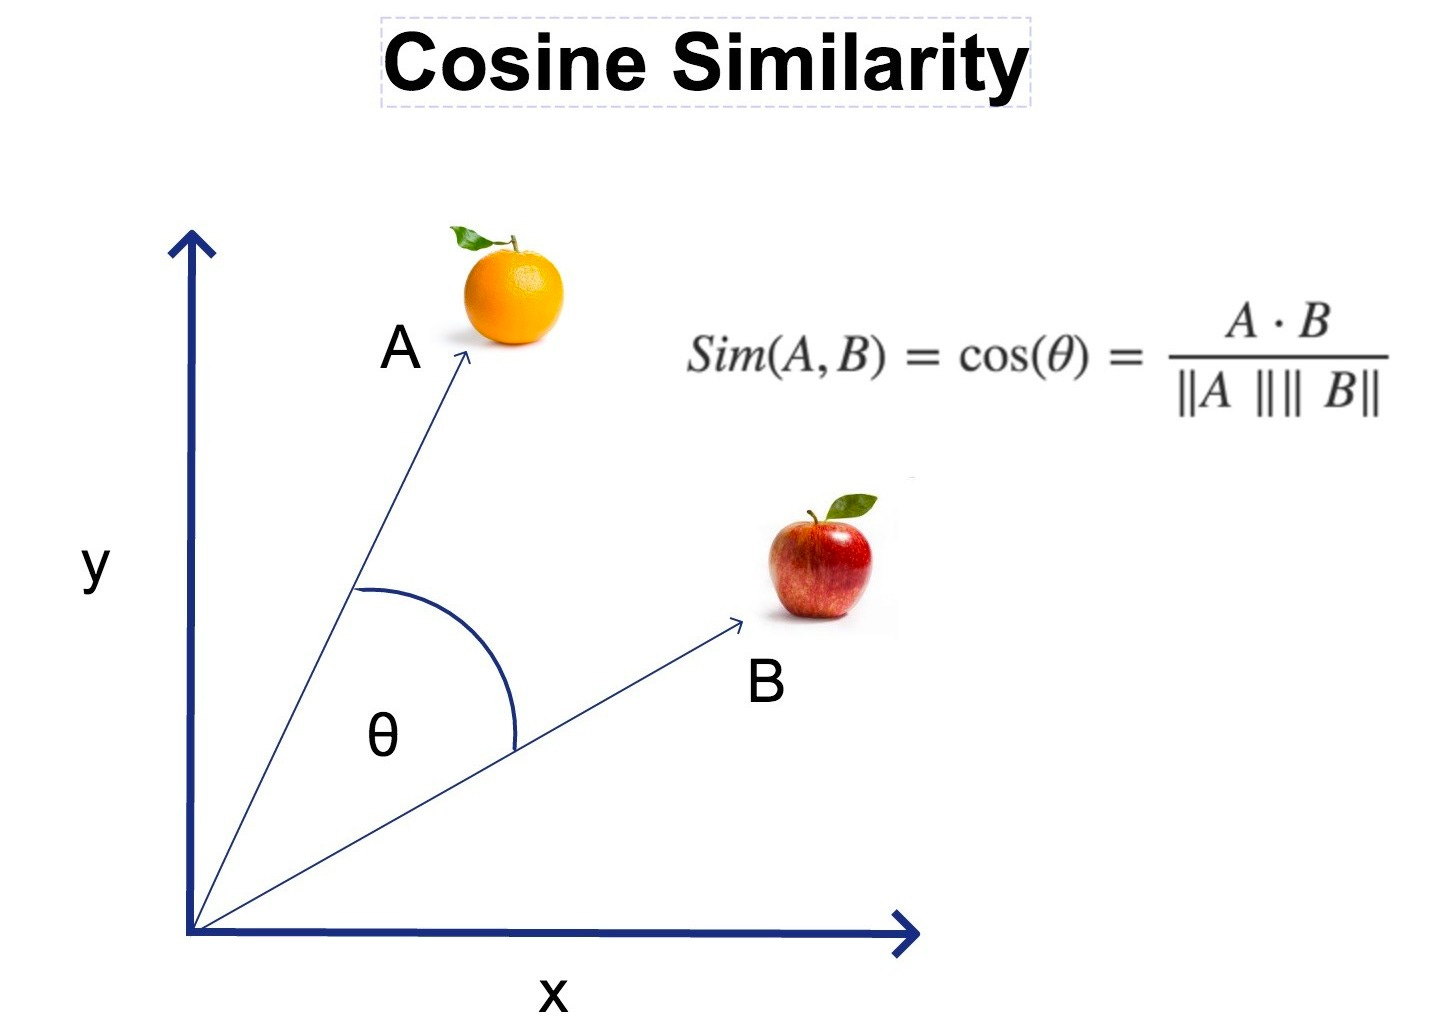

*Источник изображения: https://businessanalytics.substack.com/p/cosine-similarity-explained*

Как выглядит вектор?

In [ ]:
model.wv['стартап']

array([-0.10652066,  0.10226344,  0.02688078,  0.0137388 ,  0.00833888,
       -0.15269579,  0.02686068,  0.20419838, -0.07857352, -0.10680635,
       -0.00042962, -0.15334529, -0.00718818,  0.03146477,  0.0421587 ,
       -0.05741826,  0.03563722, -0.09072016, -0.05269654, -0.14839612,
        0.02151323,  0.05080382,  0.06469021, -0.03490504, -0.05090499,
        0.01611098, -0.10220513, -0.02396573, -0.13494901,  0.01993281,
        0.11578228, -0.00194958,  0.0527769 , -0.05062778, -0.00681159,
        0.12835367,  0.04262616, -0.06305701, -0.10090897, -0.12653437,
        0.0380755 , -0.07338164, -0.04141579,  0.03684627,  0.05595947,
       -0.01588389, -0.0566902 , -0.05707425,  0.06562602,  0.05687453,
        0.03695793, -0.11354012, -0.07375291,  0.00627255, -0.03777228,
        0.06294619,  0.08098858, -0.03069239, -0.10969219,  0.01850596,
        0.01970064,  0.02271398,  0.0022478 ,  0.00143542, -0.12764183,
        0.10867815,  0.0500347 ,  0.09267307, -0.10188887,  0.12

Где применяются "умные" вектора?

- **Информационный поиск**: хранить информацию индекса удобнее в векторах, чтобы найти релевантный ответ в Google Search, достаточно "вытащить" из каталога наиболее близкий по вектору результат

- **Виртуальные ассистенты**: чат-боты на основе ИИ также используют эту технологию, чтобы дополнять свои ответы информацией из векторной базы знаний

- **Машинное обучение**: векторные представления создают перед машинным обучением, чтобы повысить качество классификации или моделирования языка

#### Шаг 5: визуализация результатов

Визуализация многомерного изображения требует подготовки - **сокращения размерности** матрицы

Мы обучили модель с размерностью 100. Это значит, что каждый вектор нашей матрицы состоит из 100 чисел

Мы можем вывести отдельный вектор и посмотреть на эти числа, но мы не сможем нанести такой вектор на систему координат. Человеческий глаз может уловить двух- или трехмерное изображение, но большая размерность превратится для вас в "облако" из значений, которые невозможно разобрать

Как сократить размерность с 100 до 2х измерений?

**PCA (principal component analysis)** - это статистическая модель, которая поможет нам вычислить из 100 чисел 2 самых важных и привести всю информацию к виду двухмерной матрицы

- Как работает PCA: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

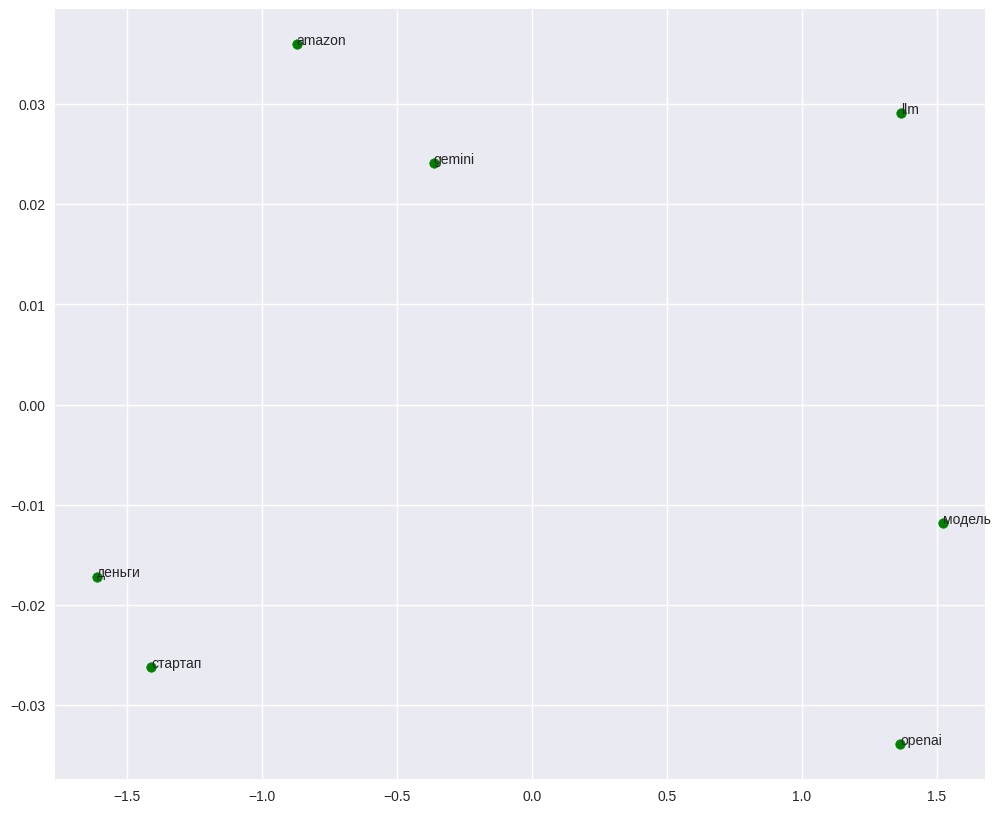

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

# Модуль для построения PCA
from sklearn.decomposition import PCA

def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # Сокращаем размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # Отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # Задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='g')
  # Добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # Соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

# Картируем несколько слов
pca_scatterplot(model, ['модель', 'llm', 'стартап', 'amazon', 'деньги', 'gemini', 'openai'])

### Домашнее задание

Попробуйте создать векторную базу знаний с помощью инструментов State-of-the-Art (наиболее производительных моделей на сегодняшний день)

1. Выберите любой текст в формате *.txt и нарежьте его на чанки с помощью инструмента из библиотеки Langchain, который мы использовали в этом занятии

In [ ]:
### Ваш код здесь ###

import json

with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)
texts = []
for message in data['messages']:

  if isinstance (message['text'], list):
    for text in message ['text']:
      if isinstance (text, str):
        texts.append(text)

      else:
        texts.append (text['text'])

  else:
    texts.append(message['text'])

with open ('tutorial_1.txt', 'w',  encoding="utf-8") as f:
   f.writelines(texts)

with open('tutorial_1.txt', 'r', encoding="utf-8") as f:
      data = f.read()

from langchain.text_splitter import RecursiveCharacterTextSplitter

# Инициализируем сплитер
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,   # Задаем размер чанка, например, 1000 символов
    chunk_overlap=100  # Задаем пересечение между чанками, равное 100 символам
)

# Производим деление на чанки
chunks = text_splitter.split_text(data)

# Выводим на экран чанки
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}:\n{chunk}\n")

Chunk 1:
Капчи для LLM - Anthropic провели хакатон в Сан-Франциско 

Собралось более двухсот человек, было немало интересных проектов.

🥇 Первое место заняла команда, которая дала Claude мануал по использованию робота, и при помощи Computer Use Claude смог управлять роботом и выполнять инструкции (хотя с заметными задержками). Задача была достаточно простой, и хотя скорость работы Claude оставляет желать лучшего, сам факт того, что это работает, впечатляет.

🥈 Второе место заняла капча, которую сложно обойти современным LLM с Computer Use. Участники показали несколько способов поймать Claude: ➖ Логические задачки — LLM всё ещё часто ошибаются на таких. ➖ Анимированные паттерны, которые видны обычному пользователю, но не видны LLM, ориентирующейся по скриншотам. ➖ Ловушки — задачи на время, которые человек просто не успеет решить, а LLM справится без вопросов. Конечно, эти решения сложно масштабировать, но задача важная и её нужно как-то решать.

Chunk 2:
🥉 Третье место занял проект по 

2. Создайте векторную базу данных с помощью SentenceTransformers, используя предоставленный код (он будет прогружаться около 5 минут)

In [ ]:
"""
Создаем векторную базу знаний с помощью модели SentenceTransformer
"""
# Загружаем Sentence Transformers
from sentence_transformers import SentenceTransformer
# Загружаем библиотеку numpy для работы с матрицами и векторами
import numpy as np
! python -m pip install chromadb
# Загружаем модель для создания векторных представлений
model = SentenceTransformer('all-MiniLM-L6-v2')

# Кодируем чанки с помощью готовой модели
vectors = model.encode(chunks)

import chromadb
from chromadb.utils import embedding_functions

CHROMA_DATA_PATH = "chroma_data/"
EMBED_MODEL = "all-MiniLM-L6-v2"
COLLECTION_NAME = "demo_docs"

client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(model_name=EMBED_MODEL)

collection = client.create_collection(
name=COLLECTION_NAME,
embedding_function=embedding_func,
metadata={"hnsw:space": "cosine"},
)

UniqueConstraintError: Collection demo_docs already exists

In [ ]:
genres = [
     "technology",
     "travel",
     "science",
     "food",
     "history",
     "fitness",
     "art",
     "climate change",
     "business",
     "music",
 ]
collection.add(
     vectors=vectors,
     ids=[f"id{i}" for i in range(len(vectors))],
     metadatas=[{"genre": g} for g in genres]
 )

TypeError: Collection.add() got an unexpected keyword argument 'vectors'

In [ ]:
"""
Создаем векторную базу знаний с помощью модели SentenceTransformer
"""
# Загружаем Sentence Transformers
from sentence_transformers import SentenceTransformer
# Загружаем библиотеку numpy для работы с матрицами и векторами
import numpy as np

# Загружаем модель для создания векторных представлений
model = SentenceTransformer('all-MiniLM-L6-v2')
model.save('sentransfor.model')
model = SentenceTransformer('sentransfor.model')
chunk_embeddings = model.encode(chunks, show_progress_bar=True)
# Кодируем чанки с помощью готовой модели
vectors = model.encode(chunks)


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

3. Создайте индекс с помощью библиотеки `faiss`, используя данный код

In [ ]:
"""
Создаем индекс с помощью FAISS
"""
# Устанавливаем библиотеку FAISS
!pip install faiss-cpu
import faiss

# Вычисляем размерность вектора
dimension = vectors.shape[1]
# Создаем индекс, числовой "каталог" текстов
faiss_index = faiss.IndexFlatL2(dimension)
faiss_index.add(np.array(vectors))
print(faiss_index.ntotal)

225


4. Проведите семантический поиск

In [ ]:
query = "Что такое LLM?" # Введите сюда свой вопрос по текстам
top_k = 1 # Выбираем, какое количество результатов мы хотим вывести (здесь 1, т.е. мы выведем только самый релевантный результат, но это число можно увеличить, например, получить 5 верхних результатов)
vector = model.encode([query]) # Кодируем вектор

# Производим поиск
distances, indices = faiss_index.search(vector, top_k)

# Создаем каталог результатов
results = []
for i, idx in enumerate(indices[0]):
        results.append({
            "chunk": chunks[idx],
            "score": float(distances[0][i])
        })

# Выводим первый результат с ответом на вопрос
print("Top results for the query:")
print(f"Chunk: {results[0]['chunk']}\nScore: {results[0]['score']}\n")

Top results for the query:
Chunk: Делитесь тем, что читаете сами и чьему мнению доверяете. Можно не только из ТГ, но и из Ютуба, и даже X (предпочтительнее русскоязычных, но англоязычных тоже будет интересно почитать).
  
Ну всё, погнали! Накидайте лайков тем комментариям, с которыми согласны, и оставьте своего фаворита.

Ссылки на телегу пишите чере `t.me/`.

@ai_newzГайд по использованию продвинутых фич LLM от Карпатого

Прошлое видео было про то, как работают LLM и их базовое использование. А здесь Карпатый показывает как он использует уже более продвинутые фичи, включая:

🔹 Работу с документами и анализ данных при помощи LLM
🔹 Что такое Deep Research и как им пользоваться
🔹 Разбирает эффективный промптинг "думающих" моделей
🔹 Как он программирует вместе с LLM
🔹 Как Artifacts позволяют создавать микро-приложения специально под пользователя
🔹 Рассказывает про оптимальную работу LLM с видео, аудио и изображениями
Score: 1.1846861839294434



5. Ответьте на вопросы

 - кратко опишите проделанную работу
 - опишите результат поиска: релевантен ли найденный отрывок?
 - где можно использовать такую систему?

Полезные материалы:

- https://habr.com/ru/companies/okkamgroup/articles/509204/ - как работает FAISS
- https://huggingface.co/sentence-transformers - документация Sentence Transformers

In [ ]:
#деление на чанки релевантно. такая система может быть использована при анализе текстов,
# так как анализировать, например, синтаксические связи в маленьких кусочках текста гораздо проще

#c векторной базой мне было работать сложнее. я не очень поняла, что надо делать и, поэтому вначале
#искала кодовые решения в документациях. но потом я вернулась в нашу лабу на паре и решила сделать
#по алогии. получается мы создаем модель, а после загружаем туда векторизированные чанки
#векторную базу можно использовать везде, где есть огромная база данных и много информации
#благодаря векторам данные будут быстрее обрабатываться

#в 3 задании мы задаем размерность вектора, а после создаем индекс. мне кажется, эту систему можно
# использовать для быстрой обработки информации и огромный данных. например, поиск людей по фото

#мы вводим запрос, кодируем вектор , производим поиск и создаем каталог результатов
#найденный отрывок , мне кажется, не релевантен. система похожа на поисквик, который найдет ответ
#в нашем тексте